<Axes: xlabel='timestamp'>

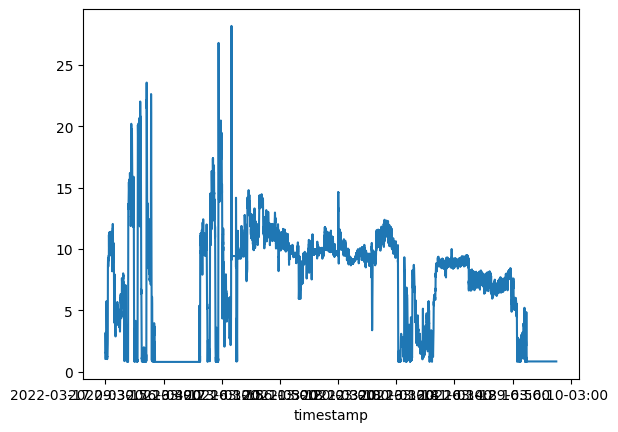

In [21]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('../../2022/boat_data_1s.csv')
df = df.set_index('timestamp')

# Filter
df['gps_speed'] = df['gps_speed'].rolling(10, center=True).mean()
df = df[(df['gps_speed'] > 0.8) & (df['gps_speed'] < 30)]
df = df.dropna()

df.columns

df['gps_speed'].plot()

<Axes: xlabel='timestamp'>

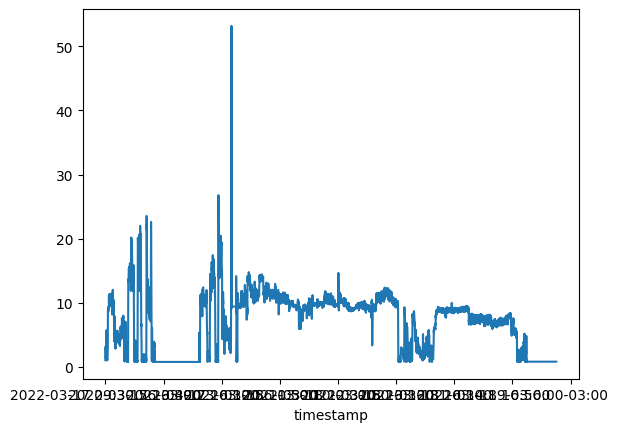

In [ ]:

def boat_speed_from_dt(dt, a=20.45313876):
    return a*dt

popt, _ = curve_fit(boat_speed_from_dt, df['esc_dt'].to_numpy(), df["gps_speed"].to_numpy())
print(popt)

speed_hat = boat_speed_from_dt(df['esc_dt'].to_numpy(), *popt)

plt.figure(figsize=(20,3))
plt.scatter(df['esc_dt'], df['gps_speed'], label='data', s=0.2)
plt.scatter(df['esc_dt'], speed_hat, label='model', s=0.5)
plt.ylabel("Boat Speed [km/h]")
plt.xlabel("Duty Cycle")
plt.title("Boat Speed vs Duty Cycle")
plt.legend()
plt.show()